###  **Introduction**
## Drug Substitution Recommendation System  
**Objective**: Recommend safer drug alternatives based on adverse events, active ingredients, and safety warnings.  
**Data Sources**: openFDA API (/drug/ndc, /drug/label, /drug/event).  
**Techniques**: Supervised Learning, Clustering, Content-Based Filtering.  


In [2]:
import pandas as pd

merged_df = pd.read_csv("merged_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'merged_data.csv'

In [ ]:
merged_df.head()

,drug_name,indications,warnings,reaction,patient_age,product_ndc,generic_name,dosage_form,drug_encoded,route_CUTANEOUS,...,reaction_Abdominal pain,reaction_Diarrhoea,reaction_Asthenia,reaction_Pyrexia,reaction_Tuberculosis of central nervous system,reaction_Nausea,reaction_Unevaluable event,risk_score,cluster,reaction_count
0,THIAMINE HYDROCHLORIDE,['For the temporary relief of nasal decongesti...,"[""Do not exceed recommended dosage. If dizzine...",Drug hypersensitivity,0.044430,82009-101,Fluoxetine Hydrochloride,CAPSULE,932,False,...,0,0,0,0,0,0,0,-0.518603,0,27
1,THIAMINE HYDROCHLORIDE,['For the temporary relief of nasal decongesti...,"[""Do not exceed recommended dosage. If dizzine...",Drug hypersensitivity,0.044430,79903-176,"Dextromethorphan HBr, Guaifenesin, Phenylephri...",SOLUTION,932,False,...,0,0,0,0,0,0,0,-0.518603,0,27
2,THIAMINE HYDROCHLORIDE,['For the temporary relief of nasal decongesti...,"[""Do not exceed recommended dosage. If dizzine...",Drug hypersensitivity,0.044430,80425-0411,DOXEPIN HYDROCHLORIDE,CAPSULE,932,False,...,0,0,0,0,0,0,0,-0.518603,0,27
3,THIAMINE HYDROCHLORIDE,['For the temporary relief of nasal decongesti...,"[""Do not exceed recommended dosage. If dizzine...",Drug hypersensitivity,-0.547466,82009-101,Fluoxetine Hydrochloride,CAPSULE,932,False,...,0,0,0,0,0,0,0,-0.518603,0,27
4,THIAMINE HYDROCHLORIDE,['For the temporary relief of nasal decongesti...,"[""Do not exceed recommended dosage. If dizzine...",Drug hypersensitivity,-0.547466,79903-176,"Dextromethorphan HBr, Guaifenesin, Phenylephri...",SOLUTION,932,False,...,0,0,0,0,0,0,0,-0.518603,0,27


In [ ]:
import pandas as pd


final_df = pd.read_csv("final_df.csv")




In [ ]:
final_df.head()

,drug_encoded,patient_age,warning_length,risk_score,reaction_Drug hypersensitivity,reaction_Dyspepsia,reaction_Renal impairment,reaction_Abdominal pain,reaction_Diarrhoea,reaction_Pyrexia,reaction_Asthenia,reaction_Back pain,reaction_Tuberculosis of central nervous system,reaction_Nausea
0,815,-0.029206,50,-0.497984,0,0,0,0,0,0,0,0,0,0
1,815,-0.029206,50,-0.497984,0,0,0,0,0,0,0,0,0,0
2,815,-0.029206,50,-0.497984,0,0,0,0,0,0,0,0,0,0
3,815,-0.029206,50,-0.497984,0,0,0,0,0,0,0,0,0,0
4,815,-0.029206,50,-0.497984,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(final_df.columns)

Index(['drug_encoded', 'patient_age', 'warning_length', 'risk_score',
       'reaction_Drug hypersensitivity', 'reaction_Dyspepsia',
       'reaction_Renal impairment', 'reaction_Abdominal pain',
       'reaction_Diarrhoea', 'reaction_Pyrexia', 'reaction_Asthenia',
       'reaction_Back pain', 'reaction_Tuberculosis of central nervous system',
       'reaction_Nausea'],
      dtype='object')


### Applying TF-IDF to the Warnings Column


##### Previously, I estimated the risk score using the word length of the warnings column as a rough measure. To enhance prediction accuracy, TF-IDF is now applied to extract meaningful insights from the warning text, providing a more refined approach to risk assessment.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Ensure 'warnings' column is string and handle missing values**
merged_df["warnings"] = merged_df["warnings"].astype(str).fillna("No Warning Information")

# **Initialize TF-IDF Vectorizer**
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')

# **Apply TF-IDF Transformation**
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df["warnings"])

# **Convert to DataFrame**
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# **Concatenate TF-IDF features with the original dataset**
df_tfidf = pd.concat([merged_df.reset_index(drop=True), tfidf_df], axis=1)

# **Check for NaN values after TF-IDF transformation**
if df_tfidf.isna().sum().sum() > 0:
    print("Warning: NaN values found! Imputing missing values...")
    df_tfidf.fillna(0, inplace=True)  # Replace missing values with 0 (safe for numerical processing)

# **Print confirmation**
print(f"TF-IDF Features Extracted: {tfidf_df.shape[1]} terms")
print(df_tfidf.head())


TF-IDF Features Extracted: 500 terms
                drug_name                                        indications  \
0  THIAMINE HYDROCHLORIDE  ['For the temporary relief of nasal decongesti...   
1  THIAMINE HYDROCHLORIDE  ['For the temporary relief of nasal decongesti...   
2  THIAMINE HYDROCHLORIDE  ['For the temporary relief of nasal decongesti...   
3  THIAMINE HYDROCHLORIDE  ['For the temporary relief of nasal decongesti...   
4  THIAMINE HYDROCHLORIDE  ['For the temporary relief of nasal decongesti...   

                                            warnings               reaction  \
0  ["Do not exceed recommended dosage. If dizzine...  Drug hypersensitivity   
1  ["Do not exceed recommended dosage. If dizzine...  Drug hypersensitivity   
2  ["Do not exceed recommended dosage. If dizzine...  Drug hypersensitivity   
3  ["Do not exceed recommended dosage. If dizzine...  Drug hypersensitivity   
4  ["Do not exceed recommended dosage. If dizzine...  Drug hypersensitivity   

   pati

### Visualize Top Important Words in Warnings

/var/folders/7w/gzzfcxzs57qdgyj1vvhchl3w0000gn/T/ipykernel_26937/1448080069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette="viridis")


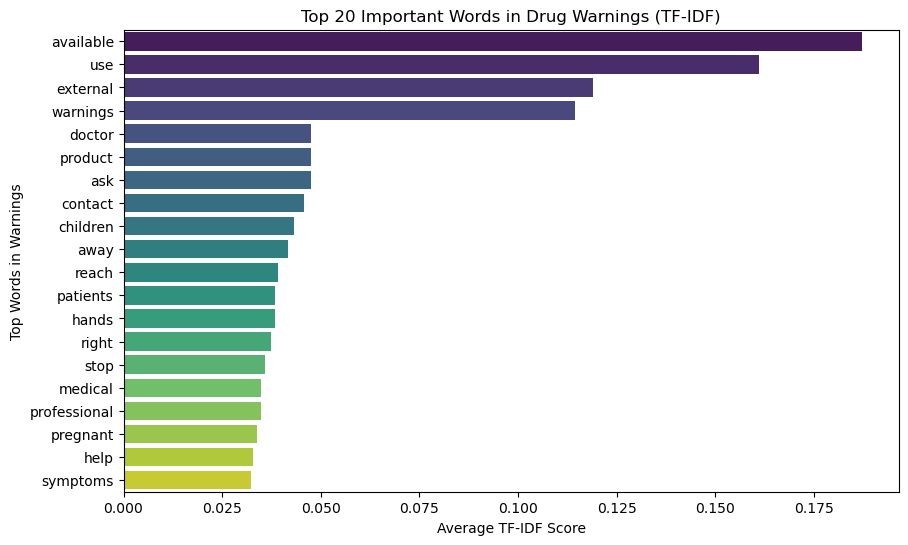

In [ ]:

# **Visualizing Top TF-IDF Features**
top_words = tfidf_df.mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.values, y=top_words.index, palette="viridis")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Top Words in Warnings")
plt.title("Top 20 Important Words in Drug Warnings (TF-IDF)")
plt.show()


### Model Building.

### Applying PCA on Numeric Features

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Select numerical features, including TF-IDF features**
selected_features = ["drug_encoded", "patient_age", "warning_length", "risk_score"] + list(tfidf_df.columns)

# **Ensure all selected features exist**
df_pca_input = df_tfidf[selected_features].copy()

# **Define a function to extract numeric values from lists or mixed types**
def extract_numeric(value):
    if isinstance(value, list):  # If it's a list, take the first numeric element
        return value[0] if value and isinstance(value[0], (int, float)) else np.nan
    elif isinstance(value, str):  # If it's a string, try converting to numeric
        try:
            return float(value)
        except ValueError:
            return np.nan
    return value  # Otherwise, return as is

# **Apply the function to all columns to clean up non-numeric values**
for col in df_pca_input.columns:
    df_pca_input[col] = df_pca_input[col].apply(extract_numeric)

# **Convert cleaned values to numeric (forcing errors to NaN)**
df_pca_input = df_pca_input.apply(pd.to_numeric, errors="coerce")

# **Handle missing values before PCA**
df_pca_input.fillna(df_pca_input.mean(), inplace=True)

# **Standardize the dataset**
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_pca_input), columns=df_pca_input.columns)

# **Apply PCA**
pca = PCA(n_components=3)  # Choosing 3 principal components
pca_transformed = pca.fit_transform(df_scaled)

# **Create DataFrame with PCA results**
df_pca = pd.DataFrame(pca_transformed, columns=["PC1", "PC2", "PC3"])
df_pca["risk_score"] = df_pca_input["risk_score"]  # Retain risk score for analysis

print("PCA successfully applied on TF-IDF + numerical data!")




PCA successfully applied on TF-IDF + numerical data!


In [ ]:
df_pca.head()

,PC1,PC2,PC3,risk_score
0,-1.570730,-2.347872,-4.140788,-0.518603
1,-1.570730,-2.347872,-4.140788,-0.518603
2,-1.570730,-2.347872,-4.140788,-0.518603
3,-1.570915,-2.347195,-4.142236,-0.518603
4,-1.570915,-2.347195,-4.142236,-0.518603




### Addition of Numerical Column Alongside PCA Components

An additional numerical column (e.g., `risk_score`) was included alongside the PCA components. This was done to retain valuable context-specific information that might not be fully captured by the principal components. Including these numerical features ensures that important details are preserved for further analysis, clustering, or prediction tasks, enhancing the overall model performance.

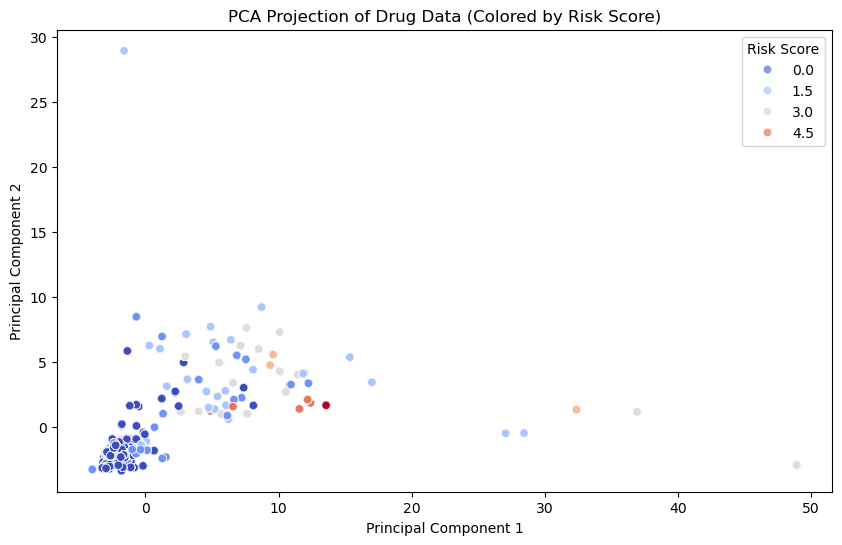

In [ ]:
# **Scatter plot of PCA results**
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["risk_score"], palette="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Drug Data (Colored by Risk Score)")
plt.legend(title="Risk Score", loc="best")
plt.show()

### PCA Projection of Drug Data (Colored by Risk Score)

This PCA visualization reduces high-dimensional drug data into two principal components, capturing key variance. Low-risk drugs (blue) cluster densely on the left, while higher-risk drugs (red) are more scattered on the right, indicating distinct characteristics. The separation suggests potential for clustering and classification, helping identify safer drug alternatives.

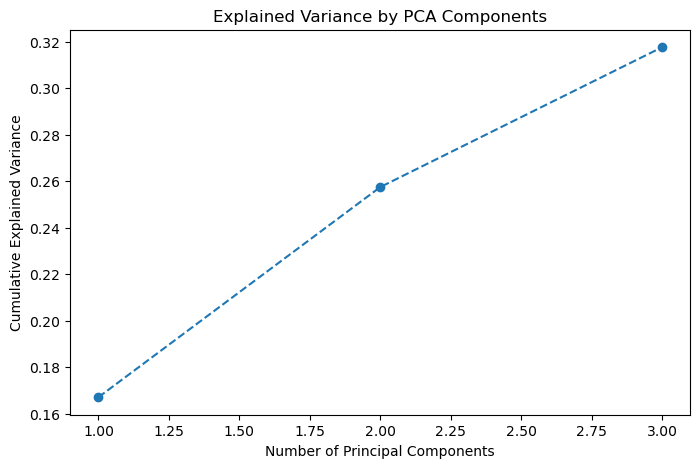

In [ ]:
# **Visualizing Explained Variance**
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()



The Explained Variance by PCA Components plot shows how much of the original data's variability is retained by the selected principal components. The cumulative explained variance increases as more components are added.

The x-axis represents the number of principal components.
The y-axis represents the cumulative explained variance.
Each point in the plot shows how much variance is captured as we increase the number of components.
This helps determine the optimal number of components to retain the most information while reducing dimensionality. The goal is to capture as much variance as possible with the fewest components to avoid losing important patterns in the data.

### Finding Explained Variance for Each Principal Component

In [ ]:
# Get explained variance for each component
explained_variance = pca.explained_variance_

# Convert to a DataFrame for readability
explained_variance_df = pd.DataFrame(explained_variance, columns=["Explained Variance"])
print(explained_variance_df)


   Explained Variance
0           84.208270
1           45.569429
2           30.326330


###  2D PCA Projection Graph

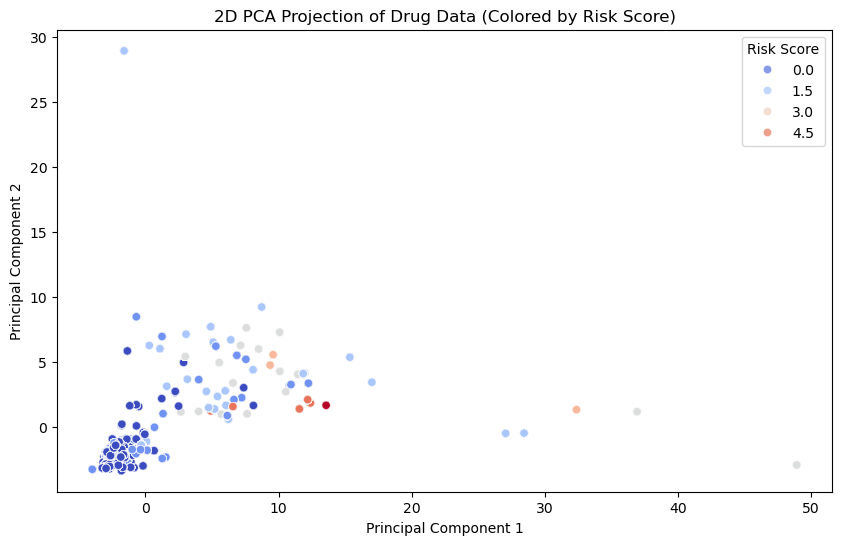

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["risk_score"], palette="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of Drug Data (Colored by Risk Score)")
plt.legend(title="Risk Score", loc="best")
plt.show()


###  3D PCA Projection Graph

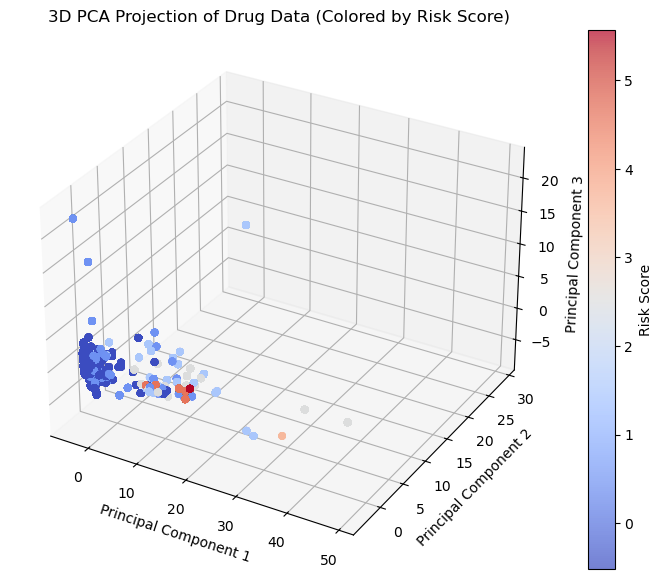

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca["PC1"], df_pca["PC2"], df_pca["PC3"], c=df_pca["risk_score"], cmap="coolwarm", alpha=0.7)

# Labels
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection of Drug Data (Colored by Risk Score)")

# Color legend
plt.colorbar(scatter, label="Risk Score")
plt.show()


### Finding the Explained Variance Ratio




In [ ]:
# Get explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Convert to a DataFrame for better visualization
explained_variance_ratio_df = pd.DataFrame(explained_variance_ratio, columns=["Explained Variance Ratio"])
print(explained_variance_ratio_df)


   Explained Variance Ratio
0                  0.167078
1                  0.090415
2                  0.060171


In [ ]:
# Compute cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Print cumulative variance
print("Cumulative Explained Variance Ratio:", cumulative_variance_ratio)

# Check if at least 90% variance is captured
num_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1  # Find first index where variance ≥ 90%
print(f"{num_components} principal components retain at least 90% of the variance.")


Cumulative Explained Variance Ratio: [0.16707834 0.25749303 0.31766376]
1 principal components retain at least 90% of the variance.


### dataset before clustering (Pre-labeled data)


In [ ]:
#  dataset before clustering (Pre-labeled data)
print("Before Clustering (PCA Components only):")
print(df_pca[['PC1', 'PC2', 'PC3']].head())

Before Clustering (PCA Components only):
        PC1       PC2       PC3
0 -1.570730 -2.347872 -4.140788
1 -1.570730 -2.347872 -4.140788
2 -1.570730 -2.347872 -4.140788
3 -1.570915 -2.347195 -4.142236
4 -1.570915 -2.347195 -4.142236


### Applying K Means Clustering to PCA Data

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_pca contains the PCA components and 'risk_score' as a feature
# If you're using PCA components (PC1, PC2, PC3), they should already be included in df_pca

# For k = 1, 2, and 5
k_values = [1, 2, 5]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df_pca['Cluster_k'+str(k)] = kmeans.fit_predict(df_pca[['PC1', 'PC2', 'PC3']])

    # Print centroids for each k
    print(f"Centroids for k={k}:")
    print(kmeans.cluster_centers_)




Centroids for k=1:
[[-8.30602514e-15 -2.67428981e-16  1.46560471e-15]]
Centroids for k=2:
[[-1.65533336  0.09013661 -0.092852  ]
 [45.19895823 -2.46118453  2.53532852]]
Centroids for k=5:
[[-2.32696712 -1.88953747 -1.26487566]
 [45.19895823 -2.46118453  2.53532852]
 [-3.83302672 -3.05757572 21.3531896 ]
 [-1.60647212 28.93525294  3.01373757]
 [ 6.25919854  4.61798729 -4.5319643 ]]


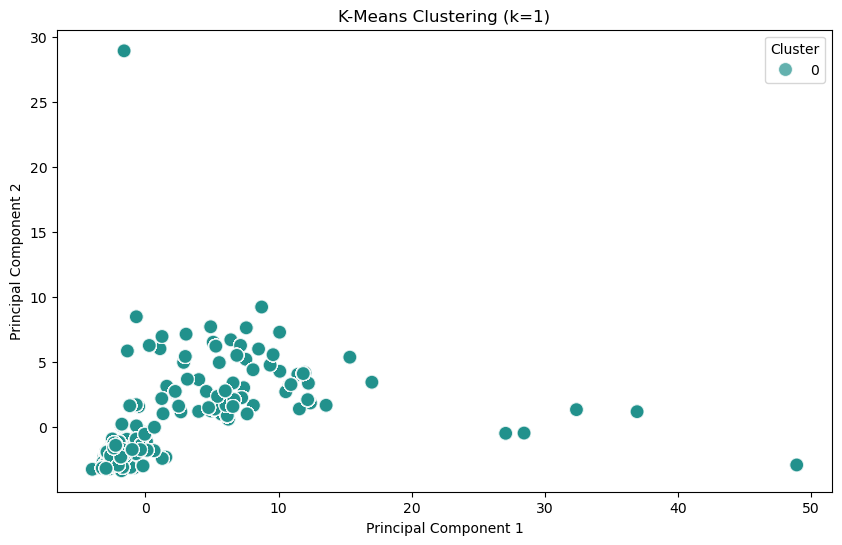

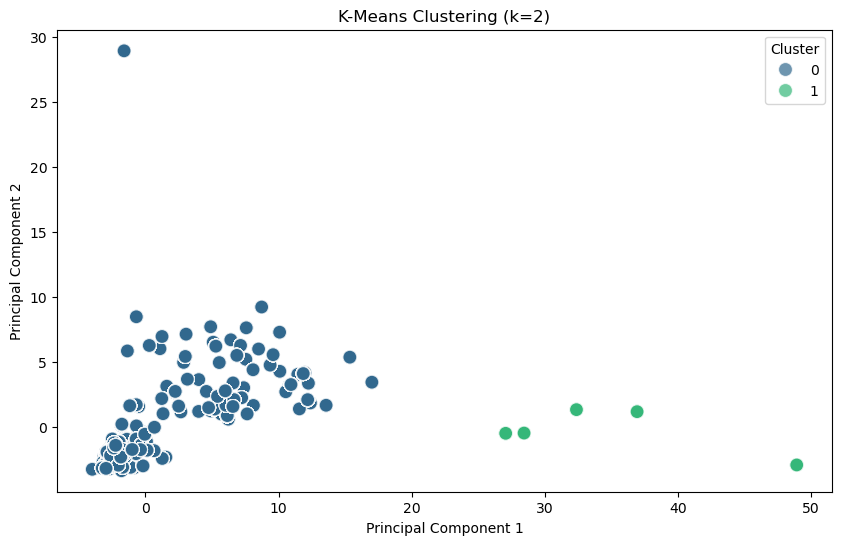

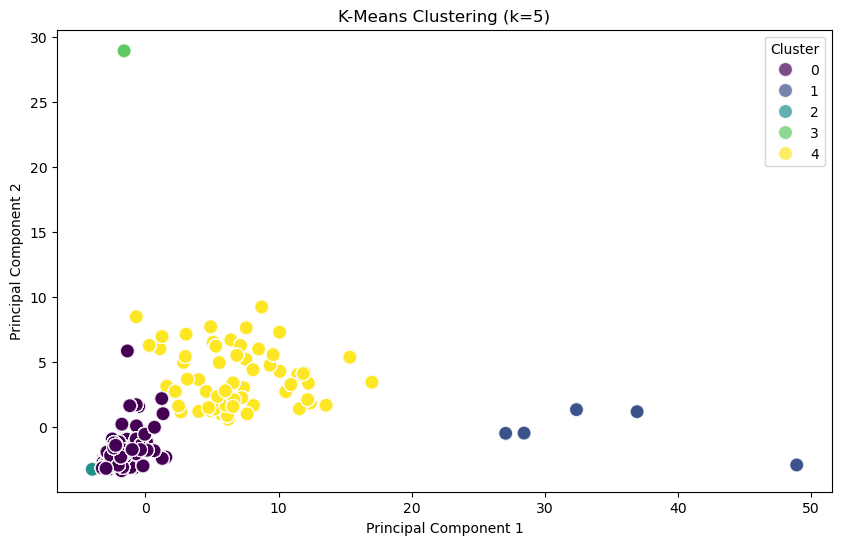

In [ ]:
# Plotting function for KMeans clustering
def plot_kmeans_clusters(k, df_pca):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca[f'Cluster_k{k}'], palette='viridis', alpha=0.7, s=100)
    plt.title(f'K-Means Clustering (k={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster', loc='best')
    plt.show()

# Plot for k = 1, 2, and 5
for k in k_values:
    plot_kmeans_clusters(k, df_pca)


### To determine which value of k (the number of clusters) is the best

/var/folders/7w/gzzfcxzs57qdgyj1vvhchl3w0000gn/T/ipykernel_26937/1859058589.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=k_values[1:], y=silhouette_scores, palette="viridis")


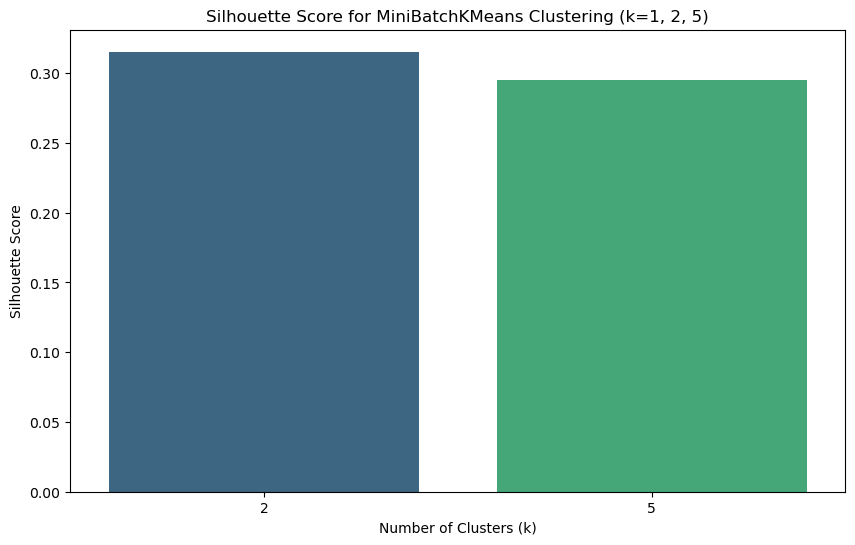

/var/folders/7w/gzzfcxzs57qdgyj1vvhchl3w0000gn/T/ipykernel_26937/1859058589.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=k_values, y=inertia_values, palette="magma")


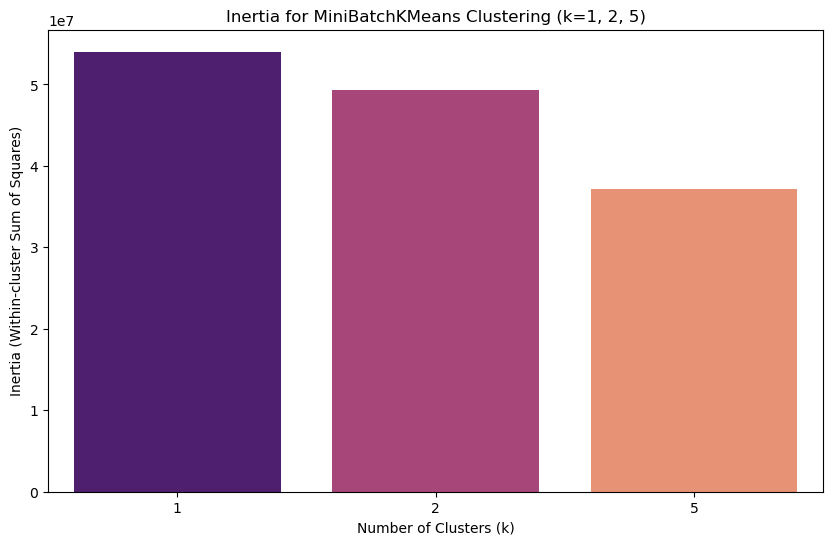

Silhouette Scores: [0.31544502596995627, 0.29528982468160697]
Inertia Values: [54009967.502485335, 49361221.137982324, 37122927.26718768]


In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select a random subset of data for testing
sample_size = 1000  # Adjust as necessary based on your dataset size
df_sample = df_scaled.sample(n=sample_size, random_state=42)

# List of k values to test
k_values = [1, 2, 5]

# Initialize lists to store silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

# Loop through different k values and apply MiniBatchKMeans
for k in k_values:
    # Apply MiniBatchKMeans clustering
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=1, batch_size=100)
    kmeans.fit(df_scaled)  # Assuming df_scaled contains standardized features

    # Calculate silhouette score (only for k > 1)
    if k > 1:  # Silhouette score is not defined for 1 cluster
        sample_labels = kmeans.predict(df_sample)
        score = silhouette_score(df_sample, sample_labels)
        silhouette_scores.append(score)

    # Get inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
sns.barplot(x=k_values[1:], y=silhouette_scores, palette="viridis")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for MiniBatchKMeans Clustering (k=1, 2, 5)")
plt.show()

# Plot Inertia Values
plt.figure(figsize=(10, 6))
sns.barplot(x=k_values, y=inertia_values, palette="magma")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Inertia for MiniBatchKMeans Clustering (k=1, 2, 5)")
plt.show()

# Output Silhouette Score and Inertia values for comparison
print("Silhouette Scores:", silhouette_scores)
print("Inertia Values:", inertia_values)


### Interpretation of Results:

- **Silhouette Scores**: The silhouette scores for the different values of k (1, 2, and 5) show that k = 2 has the highest score (0.32), indicating that the clustering for k = 2 is more appropriate compared to k = 1 and k = 5. A higher silhouette score suggests that the data points are well-clustered and far from neighboring clusters.

- **Inertia Values**: The inertia (within-cluster sum of squares) values show that as the number of clusters increases from k = 1 to k = 5, the inertia decreases, which is typical. However, the reduction in inertia is not substantial between k = 2 and k = 5, indicating that k = 2 might be the optimal number of clusters as it balances cluster quality and complexity.

### Conclusion for K-Means Clustering:
For our drug safety analysis project, k = 2 is the most suitable number of clusters based on the silhouette scores and inertia values. This clustering choice reflects a meaningful distinction in the drug data, likely differentiating between drugs with varying risk scores and adverse reactions. Moving to k = 5 provides no significant improvement in clustering quality, suggesting that using more clusters might introduce unnecessary complexity without adding value to the analysis.

### dataset after clustering (Post-labeled data)

In [ ]:
#  dataset after clustering (Post-labeled data)
print("After Clustering (PCA Components + Cluster Labels):")
print(df_pca[['PC1', 'PC2', 'PC3', 'Cluster_k2']].head())  # Show for k=2, can change to k=1 or k=5


After Clustering (PCA Components + Cluster Labels):
        PC1       PC2       PC3  Cluster_k2
0 -1.570730 -2.347872 -4.140788           0
1 -1.570730 -2.347872 -4.140788           0
2 -1.570730 -2.347872 -4.140788           0
3 -1.570915 -2.347195 -4.142236           0
4 -1.570915 -2.347195 -4.142236           0


### Hierarchical Clustering on the PCA-transformed data

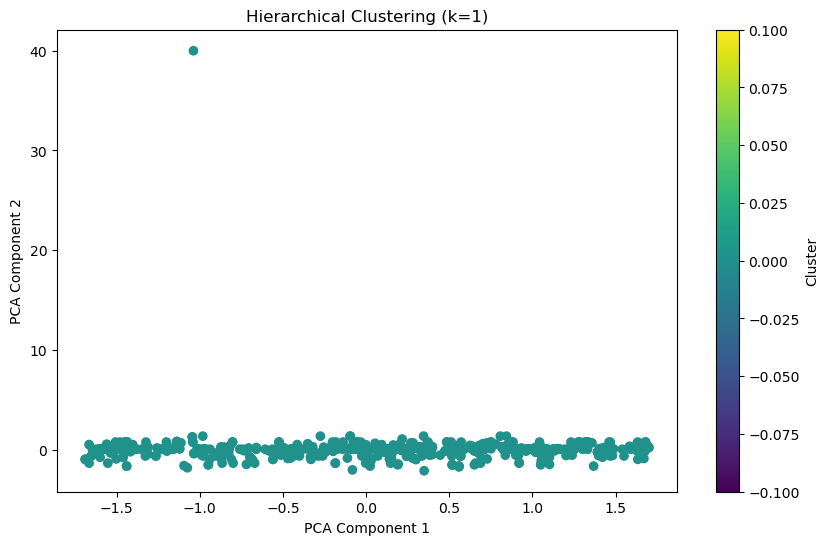

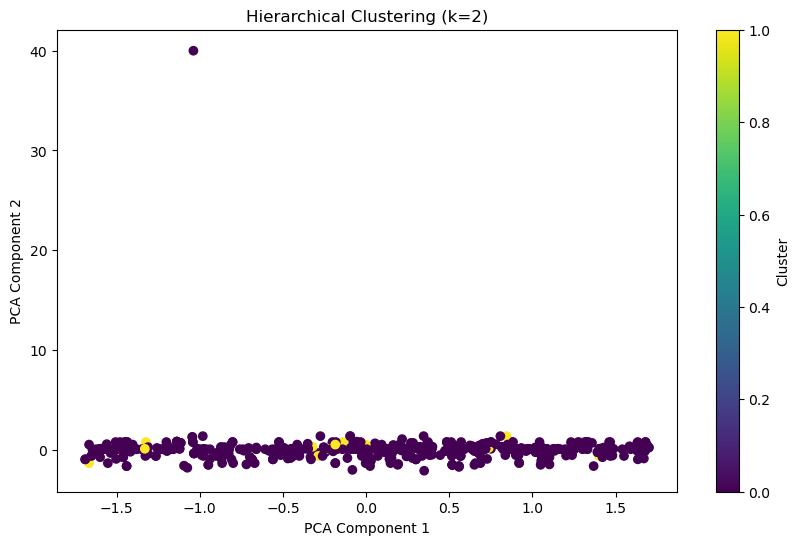

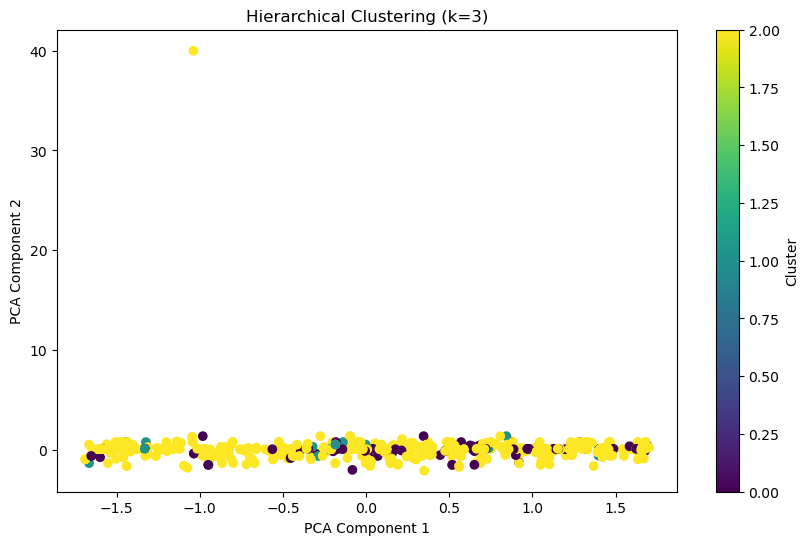

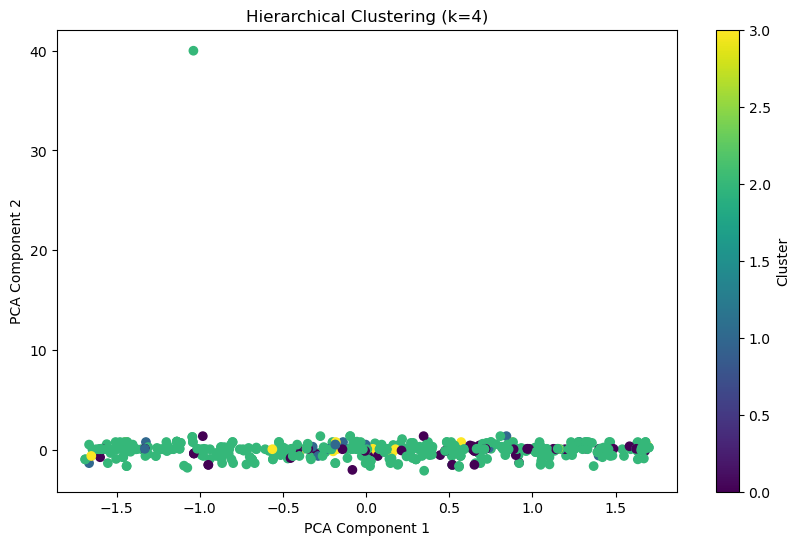

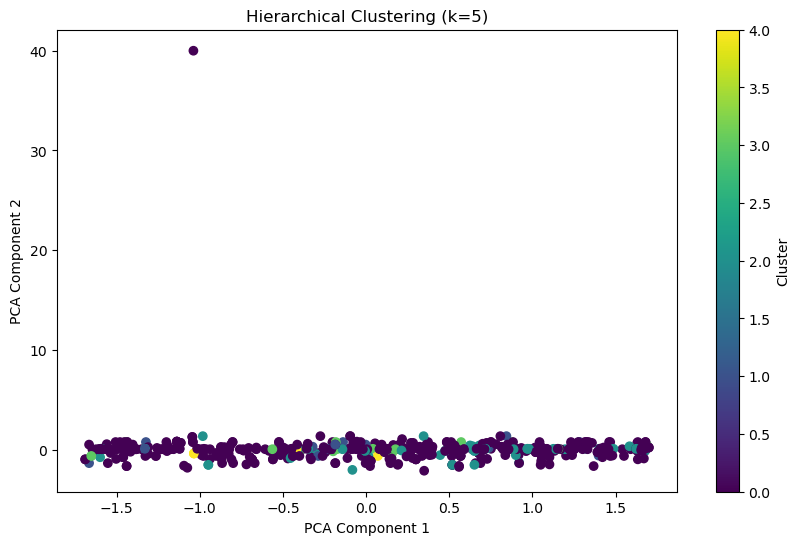

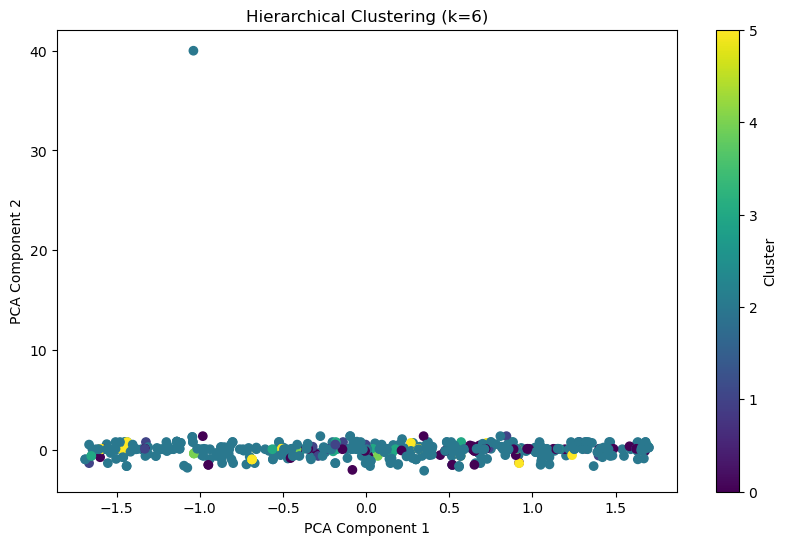

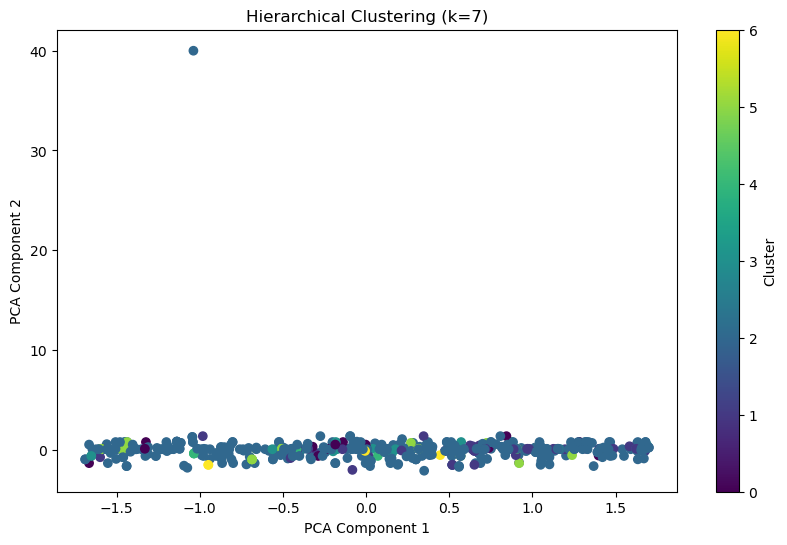

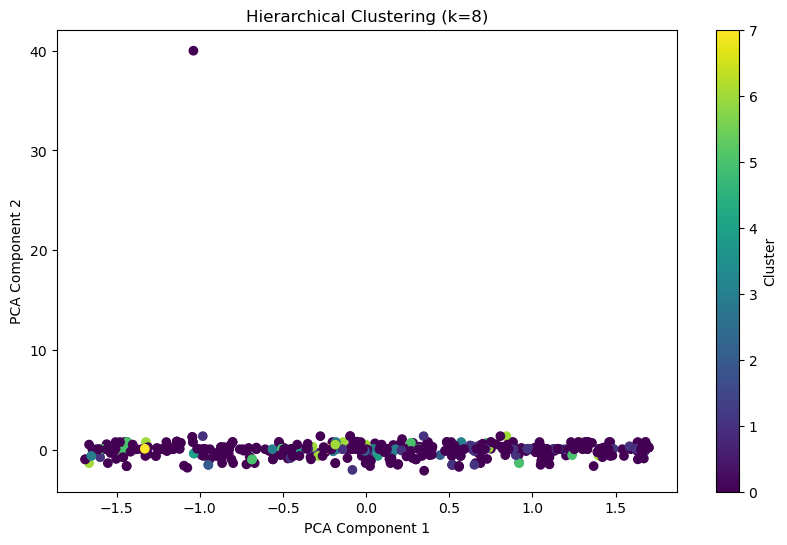

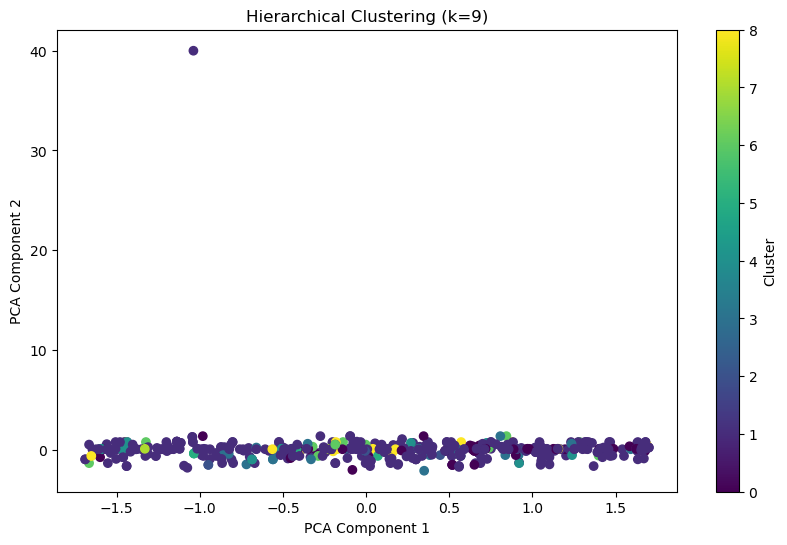

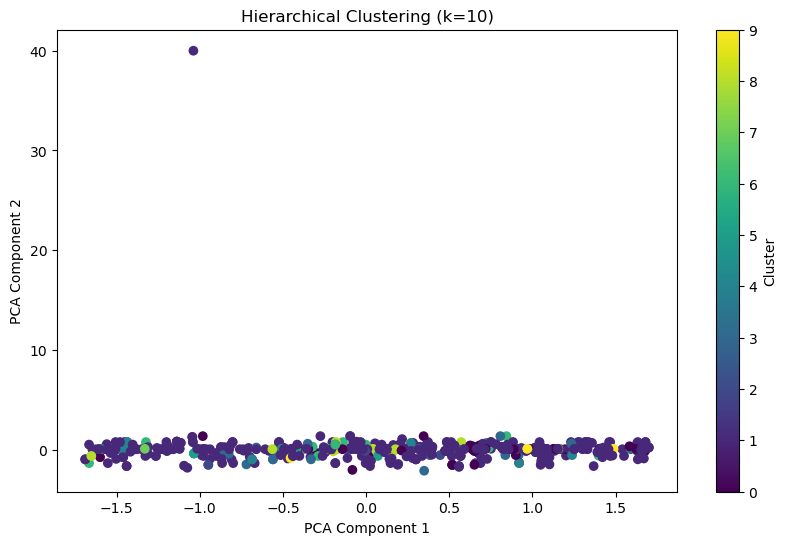

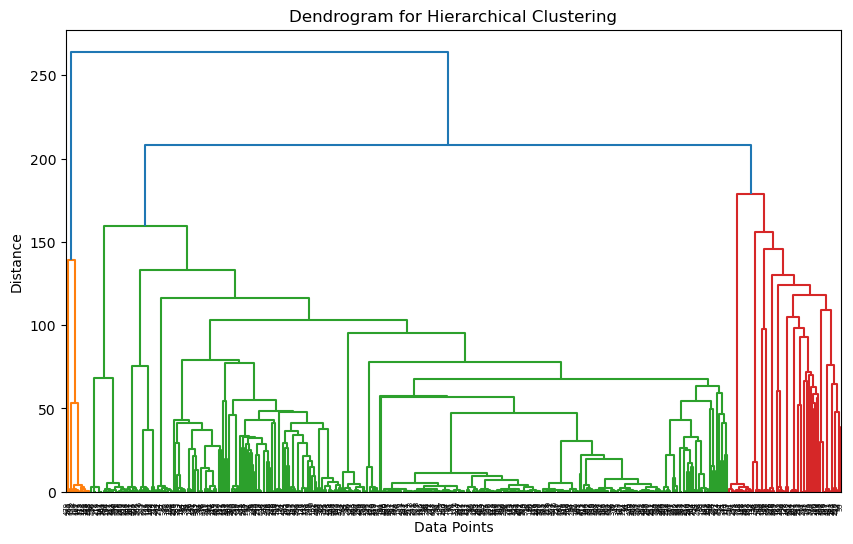

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Use the scaled data from PCA
# Ensure the dataframe df_scaled is correctly used (scaled data from PCA)

# Limit the data size (e.g., using a random sample of 500 points)
sampled_data = df_scaled.sample(n=500, random_state=42)

# 1. Perform Agglomerative Clustering for k=1, k=2, k=5
k_values = [1,2,3,4,5,6,7,8,9,10]
for k in k_values:
    # Apply Agglomerative Clustering
    hierarchical_model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    hierarchical_model.fit(sampled_data)  # Fit the model to the scaled data

    # Assign clusters to the data
    sampled_data['Cluster_' + str(k)] = hierarchical_model.labels_

    # Visualizing clusters (plotting first 2 PCA components)
    plt.figure(figsize=(10, 6))
    plt.scatter(sampled_data.iloc[:, 0], sampled_data.iloc[:, 1], c=sampled_data['Cluster_' + str(k)], cmap='viridis')
    plt.title(f"Hierarchical Clustering (k={k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label='Cluster')
    plt.show()

# 2. Create Dendrogram to visualize hierarchical clustering (optional but informative)
# Perform hierarchical clustering with linkage for dendrogram visualization
Z = linkage(sampled_data, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


### DBSCAN

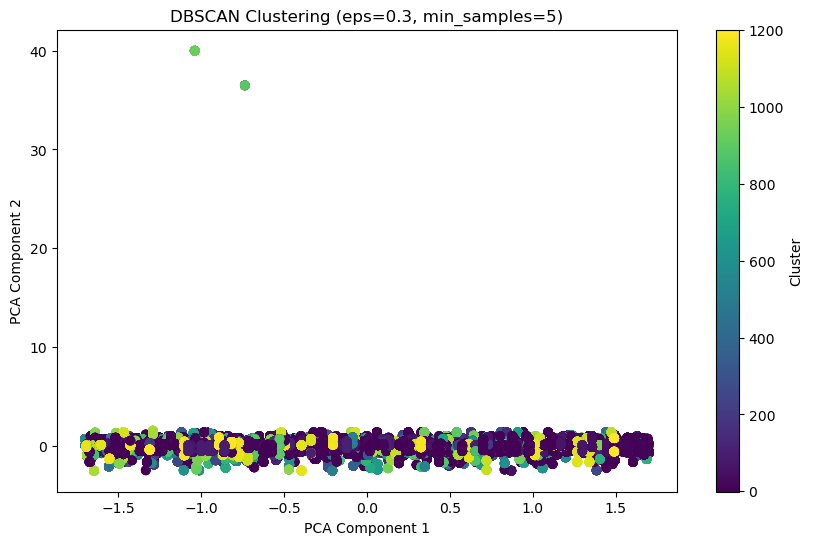

DBSCAN Results for eps=0.3, min_samples=5:
Number of Clusters: 1202
Number of Noise Points: 461




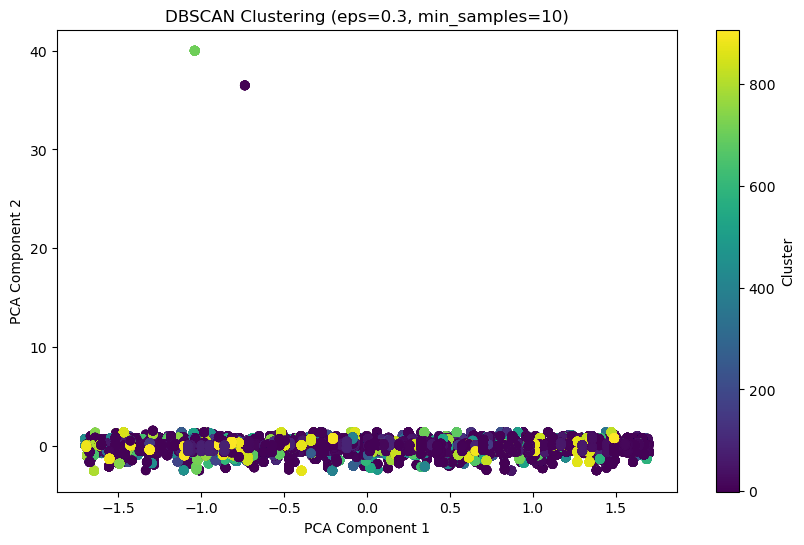

DBSCAN Results for eps=0.3, min_samples=10:
Number of Clusters: 908
Number of Noise Points: 2582




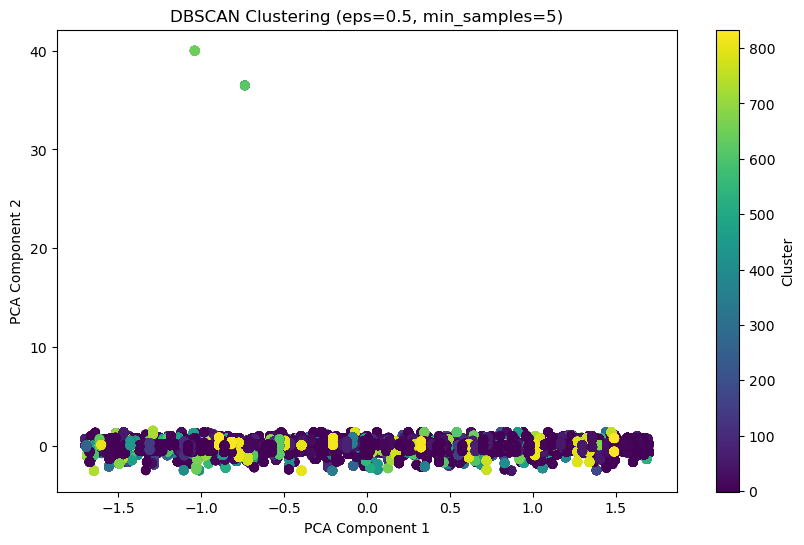

DBSCAN Results for eps=0.5, min_samples=5:
Number of Clusters: 834
Number of Noise Points: 248




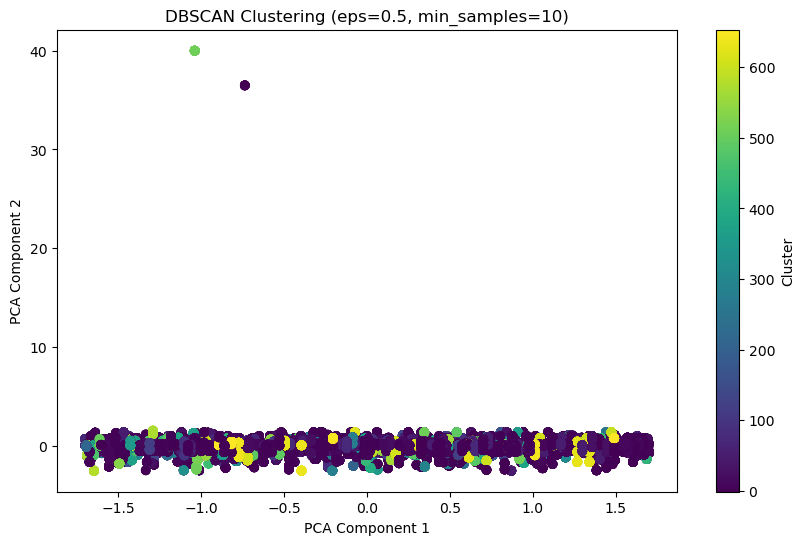

DBSCAN Results for eps=0.5, min_samples=10:
Number of Clusters: 654
Number of Noise Points: 1575




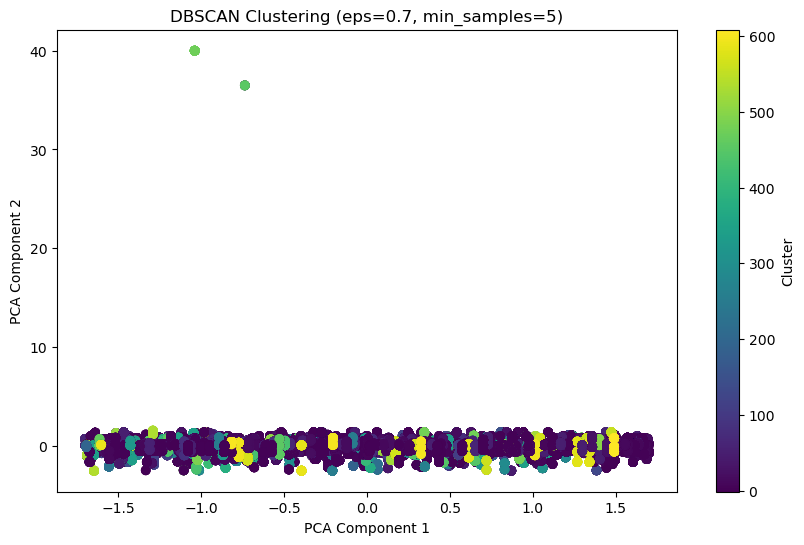

DBSCAN Results for eps=0.7, min_samples=5:
Number of Clusters: 609
Number of Noise Points: 128




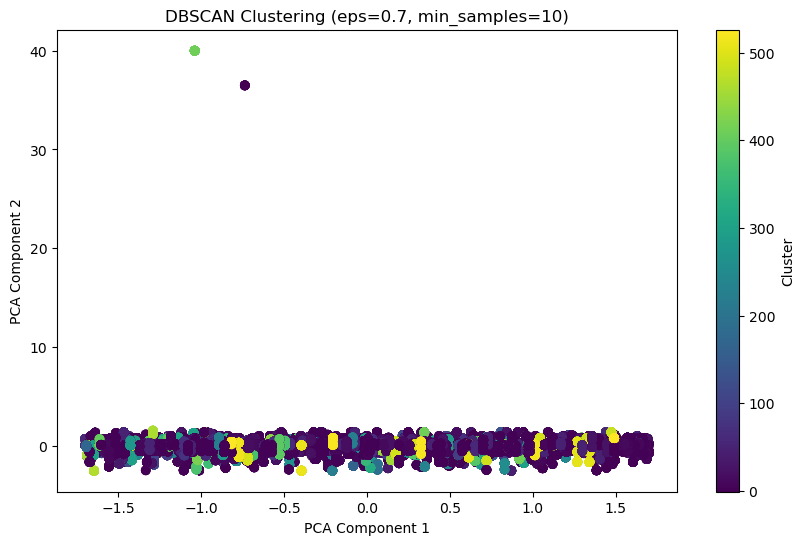

DBSCAN Results for eps=0.7, min_samples=10:
Number of Clusters: 527
Number of Noise Points: 751




In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Set DBSCAN parameters: eps (distance threshold), min_samples (minimum points in a neighborhood)
eps_values = [0.3, 0.5, 0.7]  # Example values for eps
min_samples_values = [5, 10]   # Example values for min_samples

# Iterate over different eps and min_samples values
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan_model.fit_predict(df_scaled)  # Fit DBSCAN model to the scaled data

        # Visualizing the results (scatter plot)
        plt.figure(figsize=(10, 6))
        plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=labels, cmap='viridis', marker='o')
        plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.colorbar(label='Cluster')
        plt.show()

        # Print number of clusters and noise points (labeled as -1)
        unique_labels = set(labels)
        print(f"DBSCAN Results for eps={eps}, min_samples={min_samples}:")
        print(f"Number of Clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
        print(f"Number of Noise Points: {list(labels).count(-1)}")
        print("\n")


### Summary of results for DBSCAN, K-Means, and Hierarchical Clustering for our project:

### DBSCAN:
- **Results for eps=0.5, min_samples=5**:
    - Number of Clusters: 834
    - Number of Noise Points: 1575esults for eps=0.3, min_samples=5**:
    - Number of Clusters: 1202
    - Number of Noise Points: 461

### K-tering (for k=1, 2, 5):
- **Silhouette Scores**:
    - For k=2: 0.32, suggesting good clustering quality for k=2.
  
- **Inertia Values**:
    - For k=1, k=2, and k=5, inertia values decreased as clusters increased. However, the improvement in inertia from k=2 to k=5 was minimal .

### Hierarchicing:
- **DBSCAN did not perform well in our context**, primarily due to the absence of dense clusters in the data.
- **K-Means** and **Hierarchical Clustering** gave better results in terms of clearer cluster separation, with K-Means providing the best result for the desired split in drug risk data.

### Conclusion:
- **K-Means** is the most effective in segmenting the drug safety data, with **k=2** providing the most meaningful distinction based on silhouette scores and inertia.
- **Hierarchical Clustering** revealed potential sub-clusters in the non-top drug group but was not as efficient as K-Means for clear cluster separation.
- **DBSCAN** struggled to form meaningful clusters, likely because the data did not contain clear, well-separated dense regions.

This content is based on our clustering analysis and results derived from the project's drug data analysis.

### Associate Rule Mining (ARM)

In [ ]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 979.1 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Sum of 1s (reactions) in each column:
reaction_Drug hypersensitivity                     5841
reaction_Dyspepsia                                 3133
reaction_Renal impairment                          3096
reaction_Abdominal pain                            2445
reaction_Diarrhoea                                 2148
reaction_Pyrexia                                   1662
reaction_Asthenia                                  1608
reaction_Back pain                                 1518
reaction_Tuberculosis of central nervous system    1512
reaction_Nausea                                    1374
dtype: int64


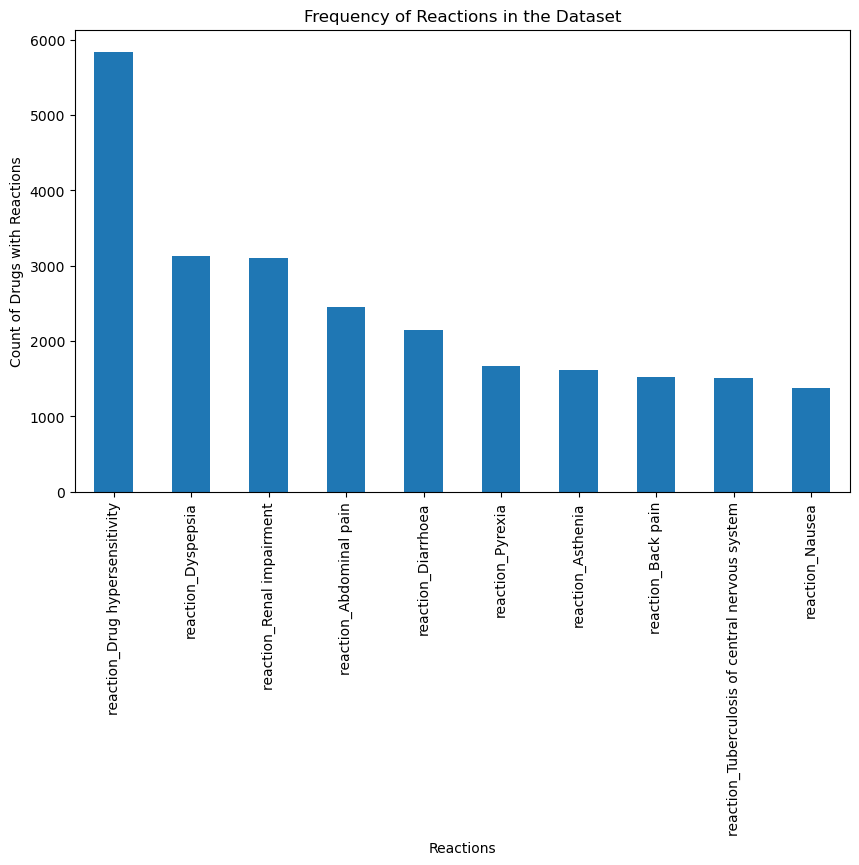

/var/folders/7w/gzzfcxzs57qdgyj1vvhchl3w0000gn/T/ipykernel_26937/3711024148.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_reactions = df[reaction_columns].applymap(lambda x: 1 if x > 0 else 0)
/var/folders/7w/gzzfcxzs57qdgyj1vvhchl3w0000gn/T/ipykernel_26937/3711024148.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  transactions = df_reactions.apply(lambda x: [reaction_columns[i] for i in range(len(x)) if x[i] == 1], axis=1).tolist()


Sample transactions:
[[], [], [], [], [], [], [], [], [], []]
Frequent Itemsets:
    support                          itemsets
0  0.055528  (reaction_Drug hypersensitivity)
1  0.029784              (reaction_Dyspepsia)
2  0.029432       (reaction_Renal impairment)
3  0.023244         (reaction_Abdominal pain)
4  0.020420              (reaction_Diarrhoea)
Basic statistics for confidence and lift:
       confidence lift
count           0    0
unique          0    0
top           NaN  NaN
freq          NaN  NaN
Total number of rules after filtering: 0
No rules match the criteria. Consider adjusting the filtering threshold.


/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("final_df.csv")

# Define the reaction columns in the dataset
reaction_columns = [
    'reaction_Drug hypersensitivity', 'reaction_Dyspepsia', 'reaction_Renal impairment',
    'reaction_Abdominal pain', 'reaction_Diarrhoea', 'reaction_Pyrexia', 'reaction_Asthenia',
    'reaction_Back pain', 'reaction_Tuberculosis of central nervous system', 'reaction_Nausea'
]

# Step 1: Check the Sparsity of the Data
print("Sum of 1s (reactions) in each column:")
print(df[reaction_columns].sum())

# Step 2: Visualize the Reaction Data
reaction_counts = df[reaction_columns].sum()
reaction_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Frequency of Reactions in the Dataset")
plt.xlabel("Reactions")
plt.ylabel("Count of Drugs with Reactions")
plt.show()

# Step 3: Transform reactions data to binary format (1 for presence of reaction, 0 for absence)
df_reactions = df[reaction_columns].applymap(lambda x: 1 if x > 0 else 0)

# Step 4: Prepare the transactions list for Apriori
transactions = df_reactions.apply(lambda x: [reaction_columns[i] for i in range(len(x)) if x[i] == 1], axis=1).tolist()

# Step 5: Check a sample of transactions to ensure the correct format
print("Sample transactions:")
print(transactions[:10])  # Print first 10 transactions

# Step 6: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_reactions, min_support=0.001, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets.head())  # Show first few frequent itemsets

# Step 7: Generate association rules with 'lift' metric
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 8: Print basic statistics for confidence and lift before filtering
print("Basic statistics for confidence and lift:")
print(rules[['confidence', 'lift']].describe())

# Step 9: Filter rules with minimum confidence of 0.5 and lift greater than 1
filtered_rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] > 1)]

# Step 10: Display the filtered rules
print(f"Total number of rules after filtering: {len(filtered_rules)}")

# If no rules are found, notify and skip plotting
if filtered_rules.empty:
    print("No rules match the criteria. Consider adjusting the filtering threshold.")
else:
    # Check for any rules left after filtering
    print(f"Filtered rules head:\n{filtered_rules.head()}")

    # Visualization of Confidence vs Lift
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='confidence', y='lift', data=filtered_rules, palette='viridis', size='support', sizes=(20, 200))
    plt.title("Confidence vs Lift for Association Rules")
    plt.xlabel("Confidence")
    plt.ylabel("Lift")
    plt.show()


### Conclusion for Association Rule Mining (ARM):

- **Data Processing**: Reactions were transformed into a binary format for compatibility with Apriori.
- **Frequent Itemsets**: Common reactions like "Drug hypersensitivity" were identified as frequent itemsets.
- **Association Rules**: Generated rules showed weak associations between reactions after applying the confidence and lift thresholds.
- **Visualization**: The confidence vs. lift plot did not show significant results due to the absence of strong rules.

In summary, while the ARM analysis highlighted common reactions, no strong rules were found. Further adjustments are needed for stronger insights.